In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Get Our Data


In [ ]:
!gdown 10ATA1I0nTMyLXVH7eKB1mJo87vatIySV
!gdown 1QHutqAPBI88tAlTu_Lobc5c5buhEAatV

Downloading...
From: https://drive.google.com/uc?id=10ATA1I0nTMyLXVH7eKB1mJo87vatIySV
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 3.09MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QHutqAPBI88tAlTu_Lobc5c5buhEAatV
To: /content/test.csv
100% 28.6k/28.6k [00:00<00:00, 57.0MB/s]


# Titanic Data Description

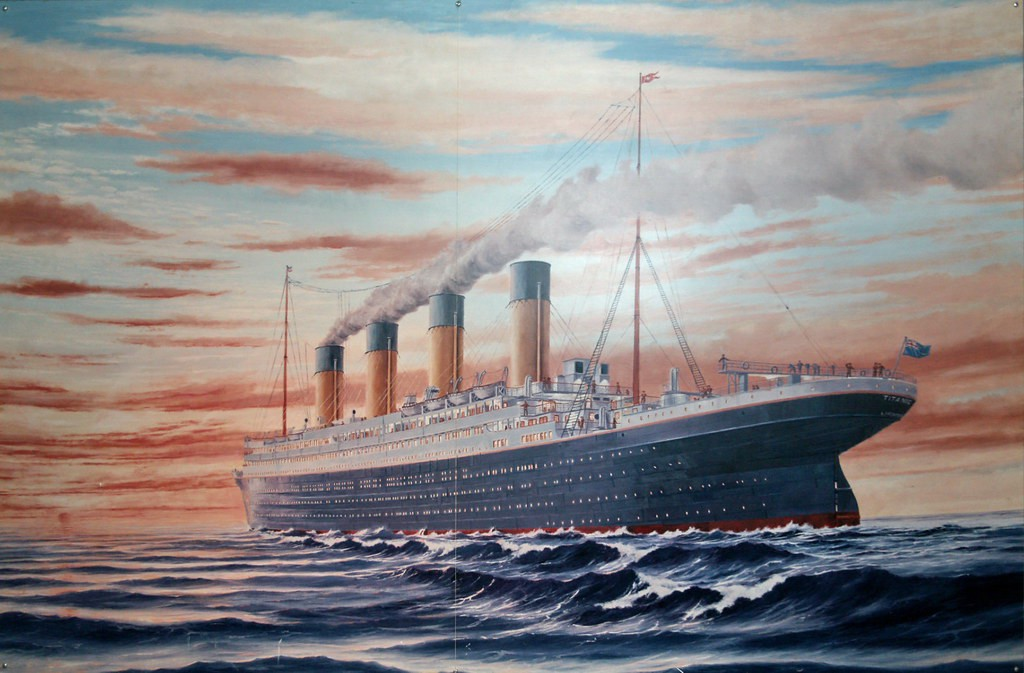



Below is a brief information about each columns of the dataset:

    PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

    Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

    Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

    Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

    Sex: Passenger's sex. It's either Male or Female.

    Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

    SibSp: Number of siblings or spouses travelling with each passenger.
    Parch: Number of parents of children travelling with each passenger.
    Ticket: Ticket number.
    Fare: How much money the passenger has paid for the travel journey.
    Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
    Embarked: Port from where the particular passenger was embarked/boarded (Southampton, Cherbourg, and Queenstown).



In [ ]:
# Import data analysis modules
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Use pandas to read csv file
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
# train_df.head()
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Feature Selection

In [ ]:
features_drop = ['Name', 'Ticket', 'Cabin'] # , 'FamilySize', 'SibSp', 'Parch',
train_df= train_df.drop(features_drop, axis=1)
test = test_df.drop(features_drop, axis=1)
train_df= train_df.drop(['PassengerId'], axis=1) # , 'AgeBand', 'FareBand'

train_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

# Use the .get_dummies() method to convert categorical data into dummy values
# train_df['Sex'] refers to the column we want to convert
# drop_first -> argument avoids the multicollinearity problem, which can undermines
# the statistical significance of an independent variable.
sex = pd.get_dummies(train_df['Sex'], drop_first=True)
embark = pd.get_dummies(train_df['Embarked'], drop_first=True)
train_df= train_df.drop(['Sex','Embarked'], axis=1)
# Use  .concat() method to merge the series data into one dataframe
train_df= pd.concat([train_df, sex, embark], axis=1)


# Age
# # Create function to impute the age value if it is null
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38 # mean by class
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age
# Apply function to impute the age for missing values
# The age column is at position 0
# The pclass column is at position 1
# axis -> argument refers to columns instead of rows to apply the impute_age function
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)
#-------------------------------------------------
# 5 different age range
# for dataset in train_df:
#     age_avg = dataset['Age'].mean()
#     age_std = dataset['Age'].std()
#     age_null_count = dataset['Age'].isnull().sum()

#     age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
#     dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
#     dataset['Age'] = dataset['Age'].astype(int) # Cast a pandas object to a specified dtype

# train_df['AgeBand'] = pd.cut(train_df['Age'], 5)


In [ ]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.14749&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

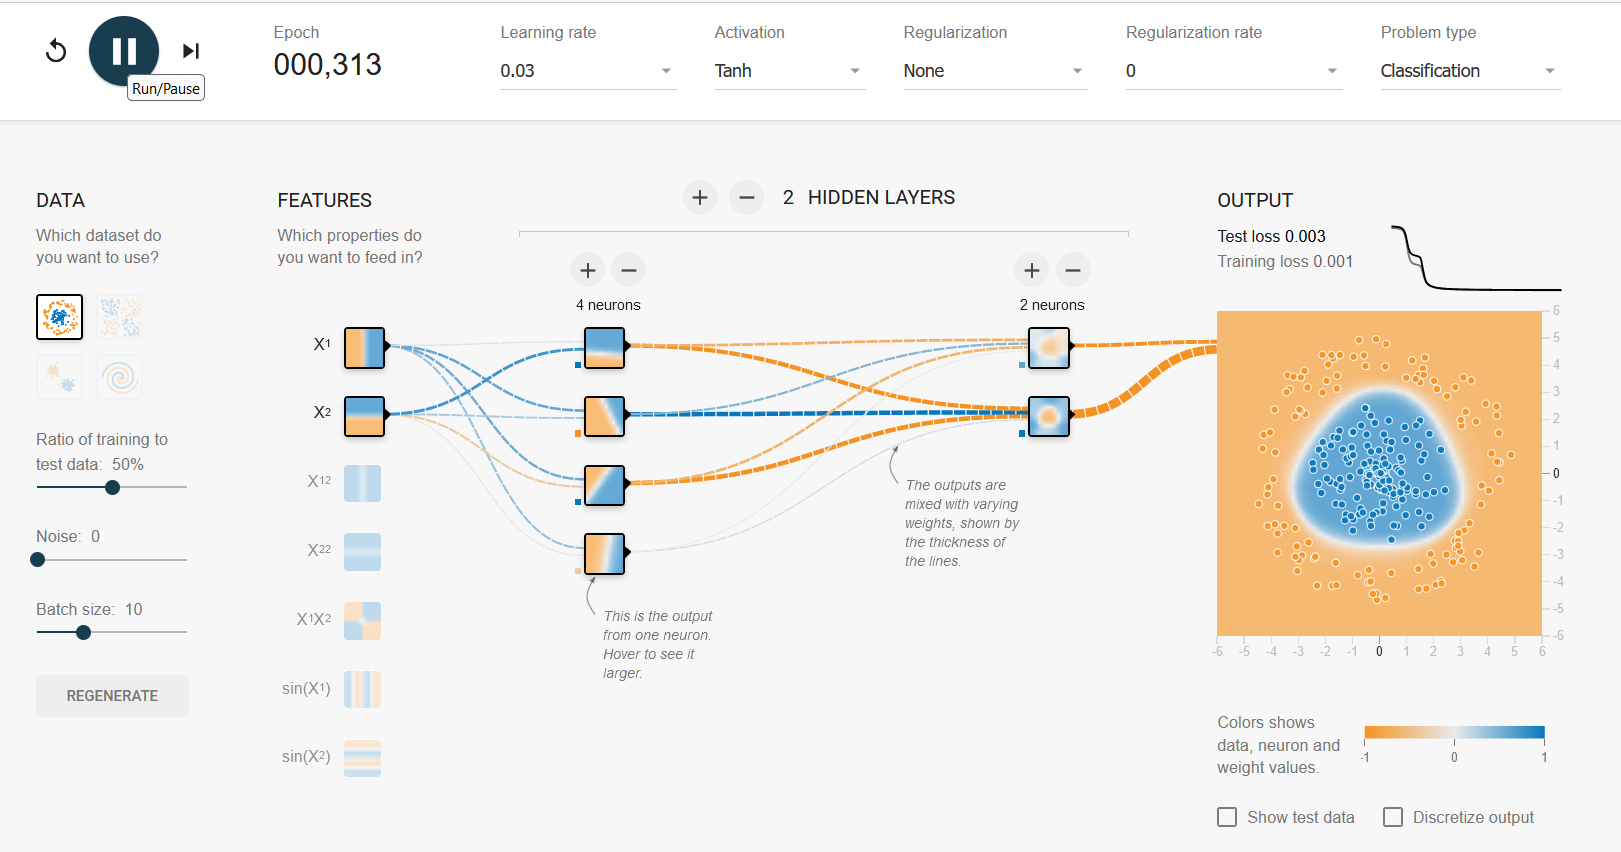


# Model, predict and solve

Now we are ready to train_dfa model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

    Logistic Regression
    KNN or k-Nearest Neighbors
    Support Vector Machines
    Naive Bayes classifier
    Decision Tree
    Random Forrest
    Perceptron
    Artificial neural network
    RVM or Relevance Vector Machine
    Stochastic Gradient Descent (SGD)



In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# X_train_df= train_df.drop("Survived", axis=1)
# y_train_df= train_df["Survived"]
# X_test_df  = test_df.drop("PassengerId", axis=1).copy()
# X_train_df.shape, y_train_df.shape, X_test_df.shape

In [ ]:
# Split data into 'X' features and 'y' target label sets
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = train_df['Survived']

# Import module to split dataset
from sklearn.model_selection import train_test_split# Split data set into training and test sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.3, random_state=101)
X_train_df.shape, y_train_df.shape, X_test_df.shape, y_test_df.shape

((623, 8), (623,), (268, 8), (268,))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Note the confidence score generated by the model based on our training dataset.

# Limited-memory BFGS (L-BFGS or LM-BFGS)
Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm (BFGS) using a limited amount of computer memory.

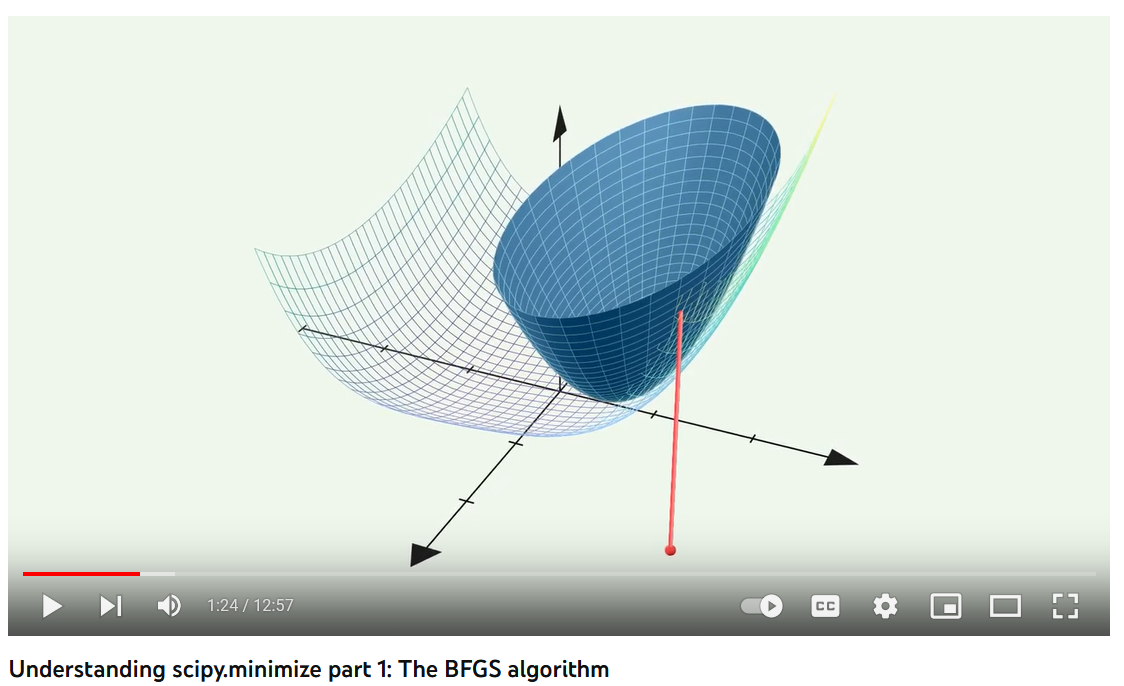

https://www.youtube.com/watch?v=VIoWzHlz7k8

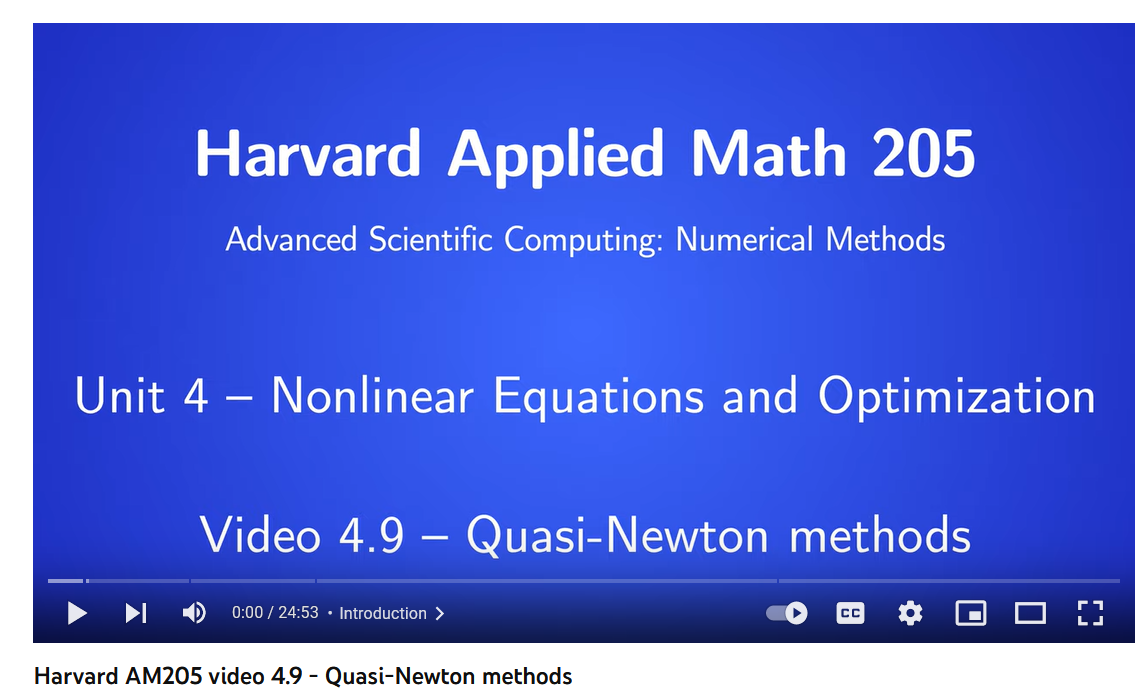

https://www.youtube.com/watch?v=mRo-NUGYZ9w

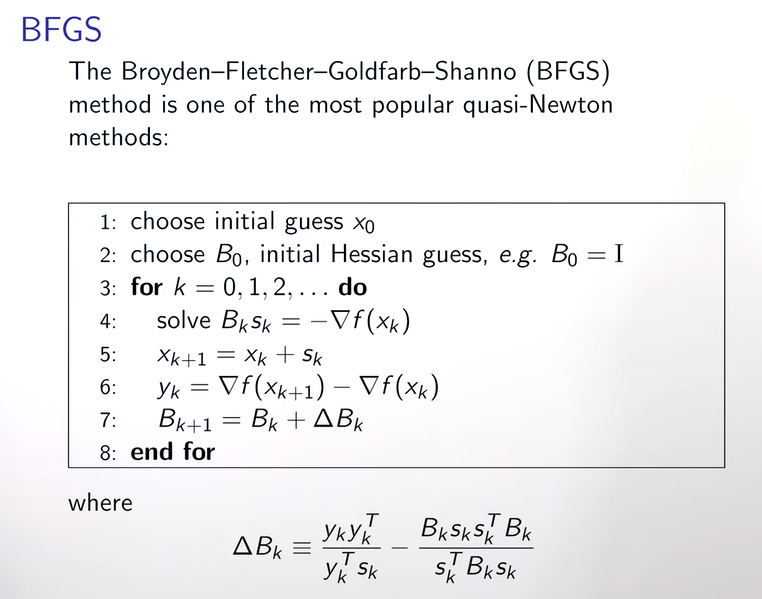

The algorithm's target problem is to minimize f ( x ) over unconstrained values of the real-vector x where f f is a differentiable scalar function.

Like the original BFGS, L-BFGS uses an estimate of the inverse Hessian matrix to steer its search through variable space, but where BFGS stores a dense n × n approximation to the inverse Hessian (n being the number of variables in the problem), L-BFGS stores only a few vectors that represent the approximation implicitly. Due to its resulting linear memory requirement, the L-BFGS method is particularly well suited for optimization problems with many variables. Instead of the inverse Hessian Hk, L-BFGS maintains a history of the past m updates of the position x and gradient ∇f(x), where generally the history size m can be small (often m < 10). These updates are used to implicitly do operations requiring the Hk-vector product.

In [ ]:
# Logistic Regression

logreg = LogisticRegression(solver='lbfgs', max_iter=3000)
logreg.fit(X_train_df, y_train_df)
Y_pred = logreg.predict(X_test_df)
acc_log = round(logreg.score(X_train_df, y_train_df) * 100, 2)
acc_log

81.86



We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

    Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
    Inversely as Pclass increases, probability of Survived=1 decreases the most.
    This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
    So is Title as second highest positive correlation.



In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Fare,0.003957
6,Q,-0.026564
1,Age,-0.040315
3,Parch,-0.085893
2,SibSp,-0.293911
7,S,-0.408389
0,Pclass,-1.071278
5,male,-2.594010


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

ote that the model generates a confidence score which is higher than Logistics Regression model.

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train_df, y_train_df)
Y_pred = svc.predict(X_test_df)
acc_svc = round(svc.score(X_train_df, y_train_df) * 100, 2)
acc_svc

68.38

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

KNN confidence score is better than Logistics Regression but worse than SVM.

In [ ]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_df, y_train_df)
Y_pred = knn.predict(X_test_df)
acc_knn = round(knn.score(X_train_df, y_train_df) * 100, 2)
acc_knn

82.83

n machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

The model generated confidence score is the lowest among the models evaluated so far.

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_df, y_train_df)
Y_pred = gaussian.predict(X_test_df)
acc_gaussian = round(gaussian.score(X_train_df, y_train_df) * 100, 2)
acc_gaussian

80.42

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train_df, y_train_df)
Y_pred = perceptron.predict(X_test_df)
acc_perceptron = round(perceptron.score(X_train_df, y_train_df) * 100, 2)
acc_perceptron

69.82

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_df, y_train_df)
Y_pred = linear_svc.predict(X_test_df)
acc_linear_svc = round(linear_svc.score(X_train_df, y_train_df) * 100, 2)
acc_linear_svc

72.87

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train_df, y_train_df)
Y_pred = sgd.predict(X_test_df)
acc_sgd = round(sgd.score(X_train_df, y_train_df) * 100, 2)
acc_sgd

74.48

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

The model confidence score is the highest among models evaluated so far.

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_df, y_train_df)
Y_pred = decision_tree.predict(X_test_df)
acc_decision_tree = round(decision_tree.score(X_train_df, y_train_df) * 100, 2)
acc_decision_tree

98.39

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_df, y_train_df)
Y_pred = random_forest.predict(X_test_df)
random_forest.score(X_train_df, y_train_df)
acc_random_forest = round(random_forest.score(X_train_df, y_train_df) * 100, 2)
acc_random_forest

98.39


# Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.39
8,Decision Tree,98.39
1,KNN,82.83
2,Logistic Regression,81.86
4,Naive Bayes,80.42
6,Stochastic Gradient Decent,74.48
7,Linear SVC,72.87
5,Perceptron,69.82
0,Support Vector Machines,68.38


Accuracy: 98 % 

Confusion Matrix in Numbers
[[392   3]
 [  7 221]]

Confusion Matrix in Percentage
[[0.99 0.01]
 [0.03 0.97]]



<Axes: >

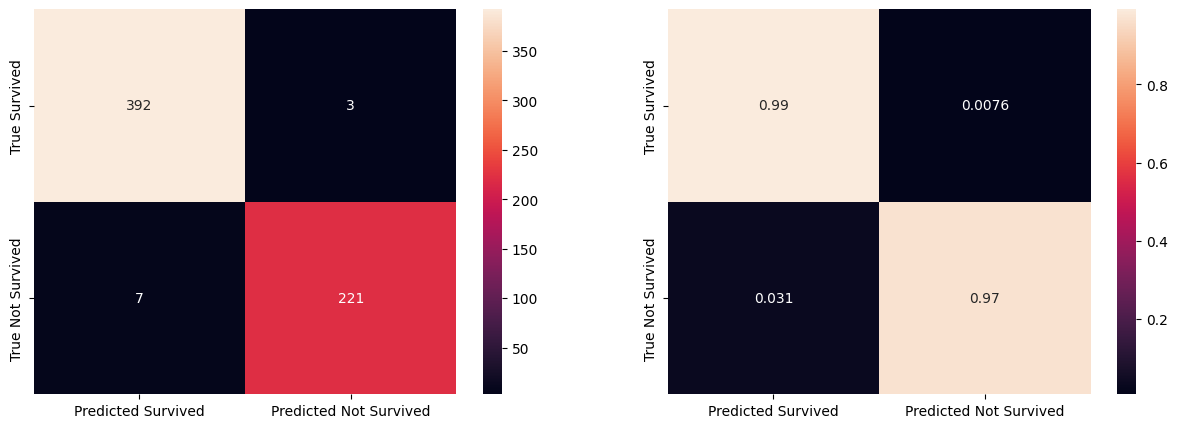

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_df, y_train_df)
y_pred_random_forest_training_set = clf.predict(X_train_df)
acc_random_forest = round(clf.score(X_train_df, y_train_df) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_df, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [ ]:
# results = pd.DataFrame({
#         "PassengerId": test_df["PassengerId"],
#         "Survived": Y_pred
    # })
# results.to_csv('../output/results.csv', index=False)

# Alternative Visualization

In [ ]:
# !pip3 install ydata_profiling --upgrade

In [ ]:
# !pip install markupsafe==2.0.1

In [ ]:
# import ydata_profiling as pp
# from ydata_profiling import ProfileReport
# import pandas as pd

# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

In [ ]:
# # Import data analysis modules
# import numpy as np
# import pandas as pd
# # Import visualization modules
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# prof = pp.ProfileReport(train_df)
# prof.to_file(output_file='output.html')

In [ ]:
# pp.ProfileReport(train_df, title = 'Pandas Profiling report of "Train" set', html = {'style':{'full_width': True}})

In [ ]:
# pp.ProfileReport(test_df, title = 'Pandas Profiling report of "Test" set', html = {'style':{'full_width': True}})

# Dropping unnecessary columns

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
drop_list = ['PassengerId', 'Name','Ticket', 'Cabin']
train_df=train_df.drop(drop_list,axis=1)

drop_list = ['Name','Ticket', 'Cabin']
test_df=test_df.drop(drop_list,axis=1)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [ ]:
common_value = 'S'
train_df["Embarked"] = train_df["Embarked"].fillna(common_value)

In [ ]:
test_df = test_df.fillna(test_df['Fare'].mean())

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 26.2+ KB


# Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df["Sex"]= le.fit_transform(train_df["Sex"])
print(train_df["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df["Sex"]= le.fit_transform(test_df["Sex"])
print(test_df["Sex"])

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df["Embarked"]= le.fit_transform(train_df["Embarked"])
print(train_df["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df["Embarked"]= le.fit_transform(test_df["Embarked"])
print(test_df["Embarked"])

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,22,0,0,7.8292,1
1,893,3,0,38,1,0,7.0000,2
2,894,2,1,26,0,0,9.6875,1
3,895,3,1,35,0,0,8.6625,2
4,896,3,0,35,1,1,12.2875,2


# Spliting the train_df & test_df datasets

In [ ]:
# X_train_df= train_df.drop("Survived", axis=1)
# y_train_df= train_df["Survived"]
# X_test_df  = test_df.drop("PassengerId", axis=1).copy()
# ''' OR
# X_train_df= train_df[:, 0:-1]
# y_train_df= train_df[:, -1]
# X_test  = test_df[:, 1:]
# '''

# Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_df= sc.fit_transform(train_df)
# X_test_df = sc.transform(test_df)

In [ ]:
# print(X_train_df)

In [ ]:
# print(y_train_df)

# Training the Classification model
## Kernel SVM


In [ ]:
# from sklearn.svm import SVC (rbf - Radial basis function kernel)
classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(X_train_df, y_train_df)
Y_pred = classifier.predict(X_test_df)

# Other algorithms

In [ ]:
# '''
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_df, y_train_df)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_df, y_train_df)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_df, y_train_df)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_df, y_train_df)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_df, y_train_df)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_df, y_train_df)

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_df, y_train_df)

# '''

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
classifier.score(X_train_df, y_train_df)
classifier = round(classifier.score(X_train_df, y_train_df) * 100, 2)
classifier

96.79

########################################################################
# Classifier

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [ ]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [ ]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [ ]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [ ]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [ ]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [ ]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()

    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.500000
1   (16.0, 32.0]  0.362222
2   (32.0, 48.0]  0.369478
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [ ]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [ ]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [ ]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1    1     0         0        0      1
1         1       1    0    2     3         1        0      3
2         1       3    0    1     1         0        1      2
3         1       1    0    2     3         0        0      3
4         0       3    1    2     1         0        1      1
5         0       3    1    2     1         2        1      1
6         0       1    1    3     3         0        1      1
7         0       3    1    0     2         0        0      4
8         1       3    0    1     1         0        0      3
9         1       2    0    0     2         1        0      3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [ ]:
candidate_classifier = SVC()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)
